# Automated Artificial Intelligence Project Recognizing Handwriting in Photographs

In our project, we have a database of MNIST handwritten digits, which comes within sklearn, containing 784 feature columns (784 dimensions). We have a training set of 60,000 examples and a test set of 10,000 examples.

In [14]:
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


mnist = fetch_openml('mnist_784')

In [7]:
mnist.data.shape

(70000, 784)

Let's define a function to visualize the digit images in the MNIST dataset:

In [15]:
def showimage(dframe, index):    
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

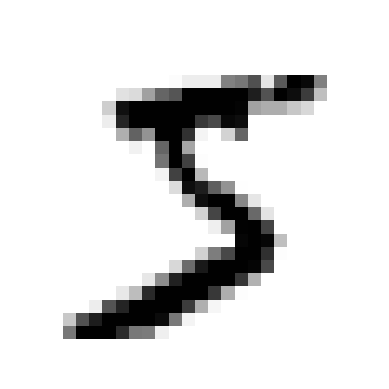

In [17]:
showimage(mnist.data,2)

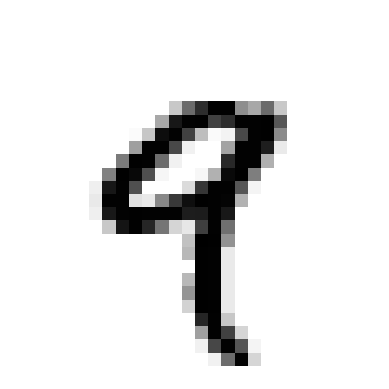

In [18]:
showimage(mnist.data,4)

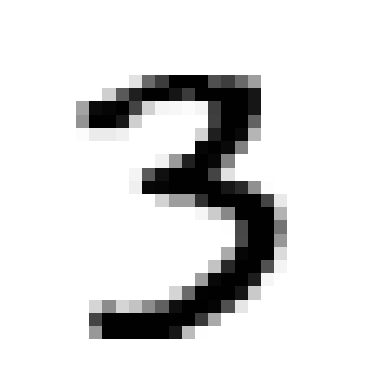

In [19]:
showimage(mnist.data,10000)

Split Data -> Training Set ve Test Set

In [98]:
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [99]:
type(train_img)

pandas.core.frame.DataFrame

In [100]:
test_img_copy = test_img.copy()

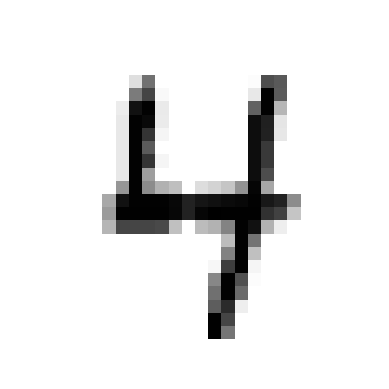

In [26]:
showimage(test_img_copy,1)

We need to scale our data

In [101]:
scaler = StandardScaler()

scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [104]:
pca = PCA(.90)

In [105]:
pca.fit(train_img)

PCA(n_components=0.9)

In [106]:
print(pca.n_components_)

234


In [107]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [108]:
logisticRegr =LogisticRegression(solver='lbfgs',max_iter=10000)

In [109]:
logisticRegr.fit(train_img,train_lbl)

LogisticRegression(max_iter=10000)

In [37]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

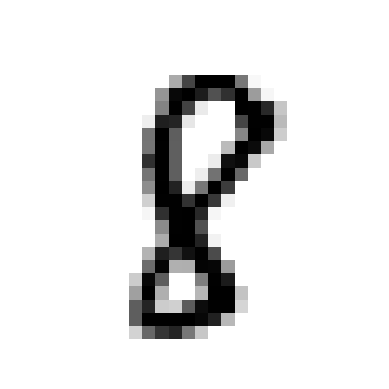

In [45]:
showimage(test_img_copy,9900)

In [44]:
logisticRegr.predict(test_img[9900].reshape(1,-1))

array(['8'], dtype=object)

# To measure the accuracy of our model.

In [110]:
logisticRegr.score(test_img,test_lbl)

0.9196

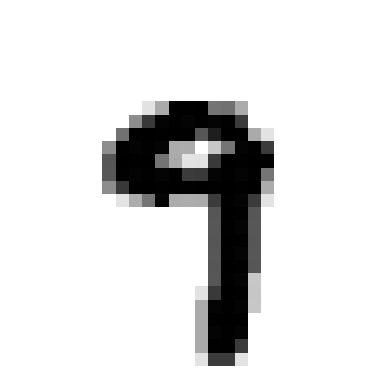

In [111]:
showimage(test_img_copy,8978)

In [112]:
logisticRegr.predict(test_img[8978].reshape(1,-1))

array(['9'], dtype=object)

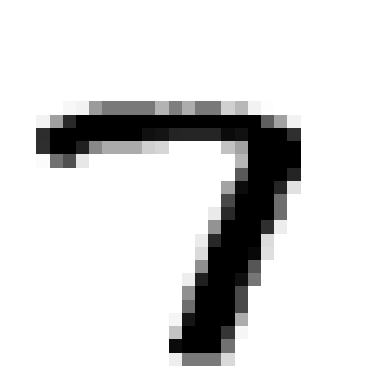

In [113]:
showimage(test_img_copy,6721)

In [114]:
logisticRegr.predict(test_img[6721].reshape(1,-1))

array(['7'], dtype=object)

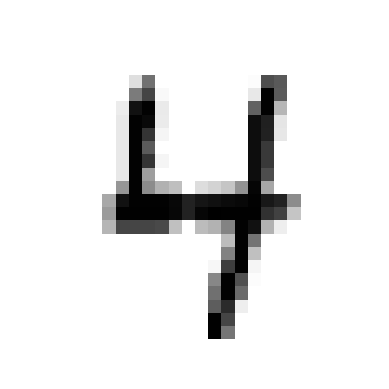

In [115]:
showimage(test_img_copy,1)

In [116]:
logisticRegr.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

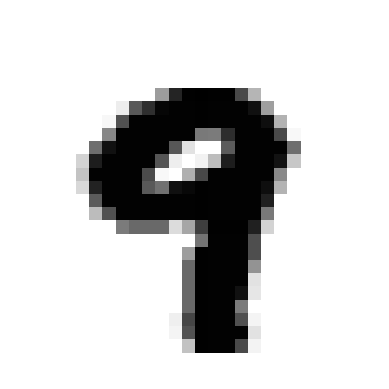

In [119]:
showimage(test_img_copy,85)

In [120]:
logisticRegr.predict(test_img[85].reshape(1,-1))

array(['9'], dtype=object)

# conclusion


In this project, we significantly reduced the training time of artificial intelligence using logistic regression by employing PCA. I aimed to preserve 95% of the variance. By lowering the variance to levels below 95%, you can experimentally determine the extent to which the time is reduced. The PCA algorithm drastically reduces the training time of artificial intelligence for hundreds or even thousands of different types of objects, making your programs run much faster.

This project brings together two completely different machine learning models to accomplish a task that may arise in everyday life by writing an artificial intelligence program on our computer!



